# 모듈

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re

from tqdm import tqdm

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam, AdamW, optimizer

from sklearn.model_selection import StratifiedKFold
from wordcloud import WordCloud

from collections import defaultdict, Counter
import konlpy

from konlpy.tag import Okt, Mecab # 한국어 형태소 분석기 중 성능이 가장 우수한 Mecab 사용
mecab = Mecab()
Okt = Okt()

In [28]:
import warnings # 경고 메시지 무시
warnings.filterwarnings(action='ignore')

from tqdm import tqdm # 작업 프로세스 시각화
import re # 문자열 처리를 위한 정규표현식 패키지
from gensim import corpora # 단어 빈도수 계산 패키지
import gensim # LDA 모델 활용 목적
import pyLDAvis.gensim_models # LDA 시각화용 패키지
from collections import Counter # 단어 등장 횟수 카운트

# 설치

### 심볼릭 링크

https://teddylee777.github.io/colab/colab%EC%97%90%EC%84%9C-python%ED%8C%A8%ED%82%A4%EC%A7%80%EB%A5%BC-permanently-%EC%9D%B8%EC%8A%A4%ED%86%A8%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95/

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/package', my_path)
sys.path.insert(0, my_path)

Mounted at /content/drive


In [27]:
pip install --target=$my_path pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 77.4 MB/s eta 0:00:00
  Using cached setuptools-67.1.0-py3-none-any.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.7/381.7 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 37.2 MB/s eta 0:00:00
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Prep

https://sosomemo.tistory.com/31 (mecab 설치)

In [2]:
!apt-get update 
!apt-get install --target=$my_path g++ openjdk-8-jdk 
!pip3 install --target=$my_path konlpy JPype1-py3 
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:14 http://archive.ubuntu.com/ubuntu foc

In [3]:
!pip install --target=$my_path konlpy selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.0 MB/s eta 0:00:00
  Using cached lxml-4.9.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (7.1 MB)
  Using cached JPype1-1.4.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (465 kB)
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.1 MB/s eta 0:00:00
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 7.8 MB/s eta 0:00:00
  

In [4]:
!apt-get install --target=$my_path fonts-nanum*
!apt-get install --target=$my_path fontconfig

E: Command line option --target=/content/notebooks is not understood in combination with the other options
E: Command line option --target=/content/notebooks is not understood in combination with the other options


# EDA

## 데이터 불러오기

In [6]:
train = pd.read_csv('/content/drive/MyDrive/2023 딥러닝/train_data.csv')
train

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


## 데이터 탐색

### 1) 제목 길이

* 뉴스 제목의 길이는 25~30자에 가장 많이 분포

In [7]:
titles = train['title']
topic_idx = train['topic_idx']

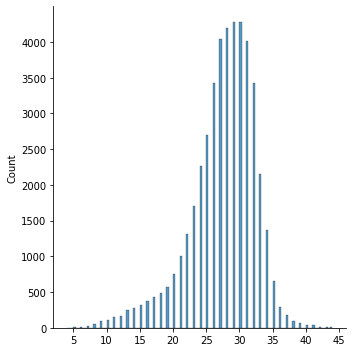

In [8]:
# train data 제목 문자열 길이
train_lengths = [len(t) for t in titles]
sns.displot(train_lengths)

Text(0.5, 0, 'length')

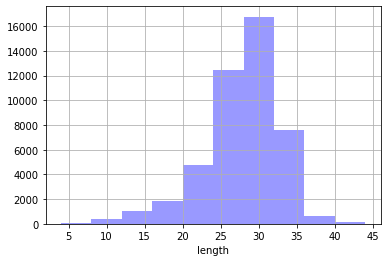

In [9]:
ax = train.title.str.len().hist(color = '#9999ff')
ax.set_xlabel("length") 

### 2) 토큰 개수

* 토큰 개수는 6~8개에 가장 많이 분포

Text(0.5, 0, '# of tokens')

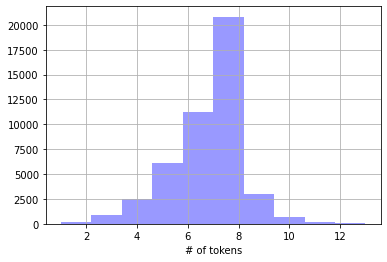

In [ ]:
ax = train.title.str.split(' ').map(lambda x: len(x)).hist(color = '#9999ff')
ax.set_xlabel("# of tokens")

## 워드클라우드

* '종합'외에 에, 는, 의와 같이 조사 분포가 많음

In [76]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from wordcloud import WordCloud

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
token_sentences = [mecab.morphs(text) for text in titles]
counter = Counter()
for title in token_sentences:
  counter.update(title)

(-0.5, 399.5, 199.5, -0.5)

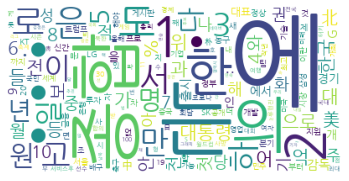

In [ ]:
# train data 단어분포
# 전체
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter)
plt.imshow(cloud)
plt.axis('off')

**인덱스 별 주제 확인**

In [ ]:
# topic_idx 열 정보 확인
## 0~6까지의 인덱스 존재 >> 인덱스 별 주제 확인
train['topic_idx'].unique()

array([4, 6, 5, 0, 1, 3, 2])

In [ ]:
# train 데이터 topic_idx 열에 있는 번호대로 추출
df_list = []
for i in range(7):
  df_list.append(train.loc[train.topic_idx==i])

In [ ]:
# df_list에서 title 열을 numpy 배열 형식으로 변환
title_list = []
for i in range(7):
  title_list.append(df_list[i].title.to_numpy())

In [ ]:
# 명사, 외래어 출력
filter_pos = ['NNP', 'NNG','SL']

In [ ]:
# 인덱스 별 title을 토큰화
token_sentence_list = []
for i in range(7):
  titles = title_list[i]
  token_sentences = [word for text in titles for word, pos in mecab.pos(text) if pos in filter_pos]
  token_sentence_list.append(token_sentences)

In [ ]:
# counter함수로 토큰수 계산
counter_list = []
for i in range(7):
  counter = Counter(token_sentence_list[i])    
  counter_list.append(counter)

(-0.5, 399.5, 199.5, -0.5)

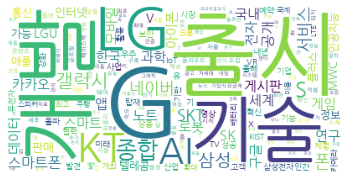

In [ ]:
# topic_idx = 0
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[0])
plt.imshow(cloud)
plt.axis('off')

* topic_idx = 0

> 단어: 개발, 출시, 기술, LG

> 분야: IT

(-0.5, 399.5, 199.5, -0.5)

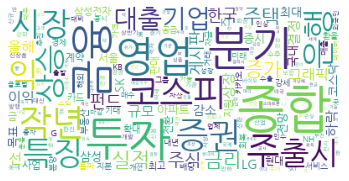

In [ ]:
# topic_idx = 1
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[1])
plt.imshow(cloud)
plt.axis('off')

* topic_idx = 1

> 단어: 코스피, 분기, 대출, 투자, 증권, 시장

> 분야: 경제

(-0.5, 399.5, 199.5, -0.5)

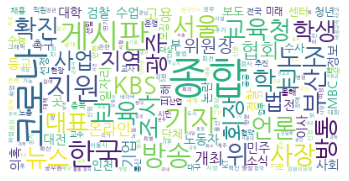

In [ ]:
# # topic_idx = 2
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[2])
plt.imshow(cloud)
plt.axis('off')

* topic_idx = 2

> 단어: 서울, 코로나, 한국, 교육청, 방송

> 분야: 사회

(-0.5, 399.5, 199.5, -0.5)

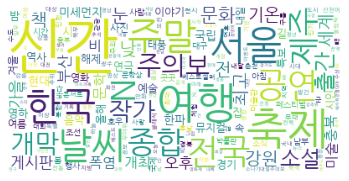

In [ ]:
# topic_idx = 3
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[3])
plt.imshow(cloud)
plt.axis('off')

* topic_idx = 3

> 단어: 신간, 주말, 서울, 여행, 축제, 공연, 날씨

> 분야: 생활/문화

(-0.5, 399.5, 199.5, -0.5)

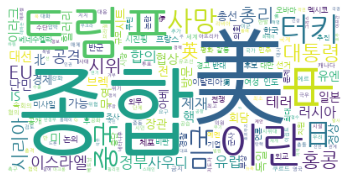

In [ ]:
# topic_idx = 4
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[4])
plt.imshow(cloud)
plt.axis('off')

* topic_idx = 4

> 단어: 트럼프, 종합, 미, 터키, 이란

> 분야: 세계

(-0.5, 399.5, 199.5, -0.5)

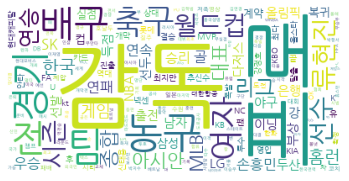

In [ ]:
# topic_idx = 5
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[5])
plt.imshow(cloud)
plt.axis('off')

* topic_idx = 5

> 단어: 감독, 배구, 축구, 월드컵, 프로

> 분야: 스포츠

(-0.5, 399.5, 199.5, -0.5)

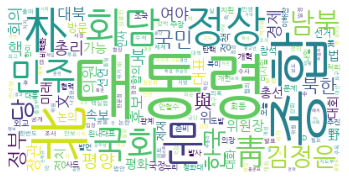

In [ ]:
# topic_idx = 6
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[6])
plt.imshow(cloud)
plt.axis('off')

* topic_idx = 6

> 단어: 대통령, 정상, 회담, 국회, 당

> 분야: 정치

1. topic_idx = 1 : IT
2. topic_idx = 2 : 경제
3. topic_idx = 3 : 사회
4. topic_idx = 4 : 생활/문화
5. topic_idx = 5 : 세계
6. topic_idx = 6 : 스포츠
7. topic_idx = 7 : 정치

https://dacon.io/competitions/official/235747/codeshare/3071?page=1&dtype=recent (단어 제거)
//
https://dacon.io/competitions/official/235747/codeshare/3050?page=1&dtype=recent (워드클라우드)

## 형태소 분석

> 패키지

한국어 자연어 처리를 위해서는 KoNLPy(코엔엘파이)라는 파이썬 패키지를 사용할 수 있습니다. 코엔엘파이를 통해서 사용할 수 있는 형태소 분석기로 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)가 있습니다.


https://wikidocs.net/21698

> 형태소 분석

단어 토큰화는 토큰의 단위를 단어로 하여, 코퍼스 내 텍스트를 단어 단위로 구분하는 작업을 의미합니다. 영어의 경우 단어 토큰화를 수행할 때 띄어쓰기를 단어 구분 기준으로 하는데, 이를 어절 토큰화라고 합니다. 그런데 한국어의 경우 단어 토큰화를 수행할 때 어절 토큰화를 사용하는 것은 부적절합니다. 이는 한국어가 교착어라는 점에 기인합니다. 대신, 한국어의 경우 단어 토큰화를 수행할 때 토큰의 단위를 형태소로 하는 형태소 토큰화를 사용합니다.

> 교착어

한국어는 교착어입니다. 교착어란 조사, 어미 등을 붙여서 말을 만드는 언어를 의미합니다. 예를 들어, “그”라는 단어에 다양한 조사를 붙여서 “그가”, “그에게”, “그를”, “그와” 등의 말을 만들 수 있습니다. 이때 조사는 “그”라는 단어 뒤에 띄어쓰기 없이 바로 붙게 됩니다. 즉 한국어는 어절이 독립적인 단위로 구성되지 않습니다. 조사 등의 무언가가 붙어있는 경우가 많기 때문입니다. 따라서 어절 토큰화를 사용할 수 없습니다. NLP에서는 단어의 형태가 달라 같은 단어임에도 다른 단어인 것처럼 취급되는 것이 큰 문제로 작용합니다. 따라서 한국어에서는 조사, 어미 등을 분리해야 할 필요가 있습니다. 이를 위해서는 토큰의 단위를 형태소로 하는 형태소 토큰화를 사용해야 합니다.

https://cheris8.github.io/data%20analysis/TP-Morpheme-Analysis/

**토픽 별 형태소 분석**

In [10]:
from konlpy.tag import Okt, Mecab
mecab = Mecab()

In [74]:
topic_0 = train[train.topic_idx == 0]
topic_1 = train[train.topic_idx == 1]
topic_2 = train[train.topic_idx == 2]
topic_3 = train[train.topic_idx == 3]
topic_4 = train[train.topic_idx == 4]
topic_5 = train[train.topic_idx == 5]
topic_6 = train[train.topic_idx == 6]

In [72]:
# 형태소 분석 함수
def analysis(data):
    joins = data.title.to_list()
    units = []
    for i in joins:
        units.extend(mecab.morphs(i))
    up2_units = []
    for i in units:
        if len(i) > 1:
            up2_units.append(i)
    import collections
    unit_count2 = collections.Counter(up2_units)
    most2 = unit_count2.most_common() # 빈도 수로 나열
    word, count = [], []
    for i, j in most2[:40]:
        word.append(i)
        count.append(j)

    plt.rcParams['font.family'] = 'NanumGothic'
    plt.figure(figsize=(10,10))
    sns.barplot(x=count, y=word)

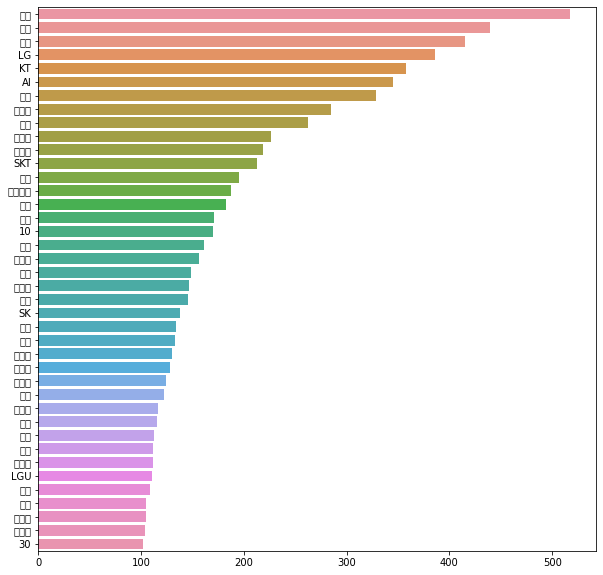

In [77]:
analysis(topic_0)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

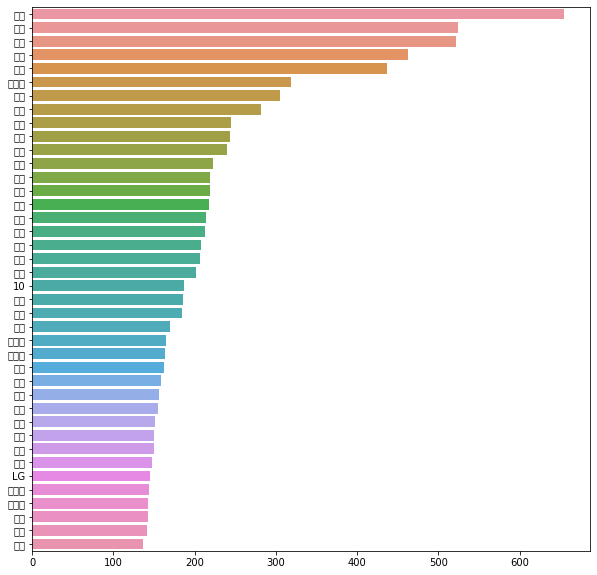

In [ ]:
analysis(topic_1)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_

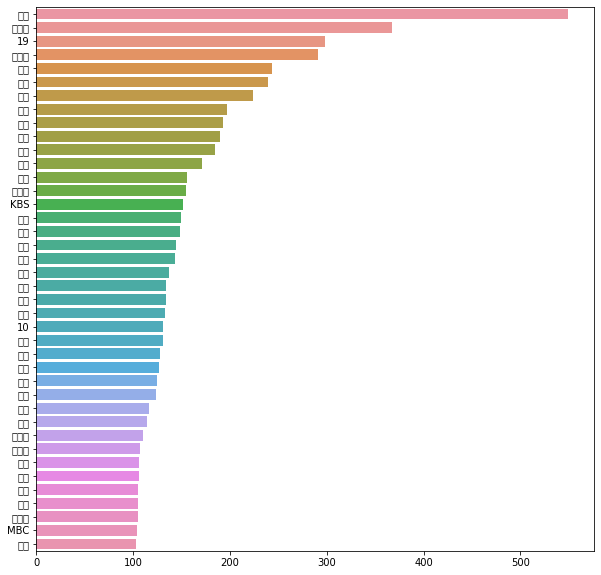

In [ ]:
analysis(topic_2)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_

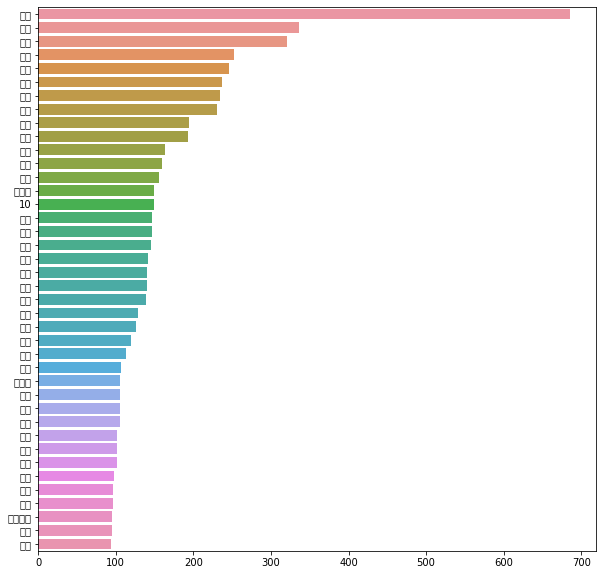

In [ ]:
analysis(topic_3)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47100 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

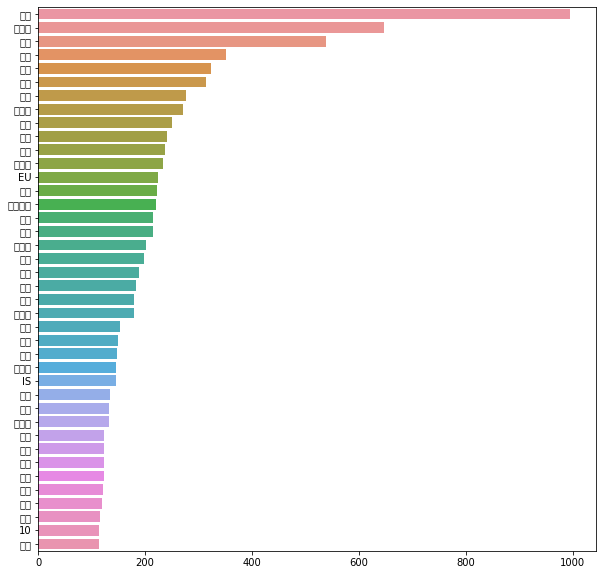

In [ ]:
analysis(topic_4)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_

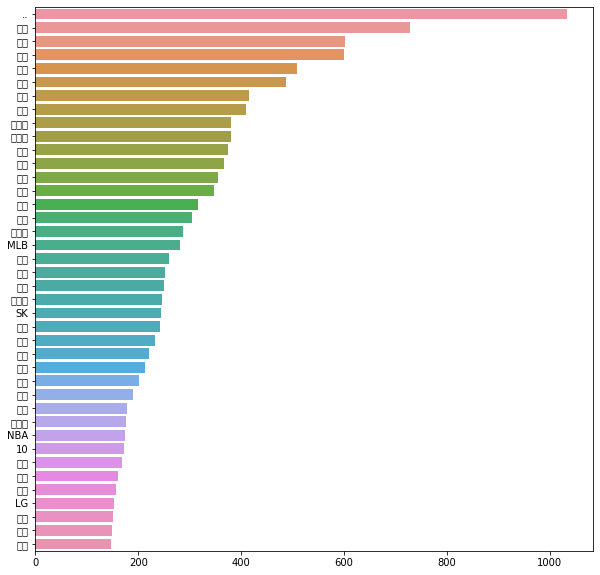

In [ ]:
analysis(topic_5)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

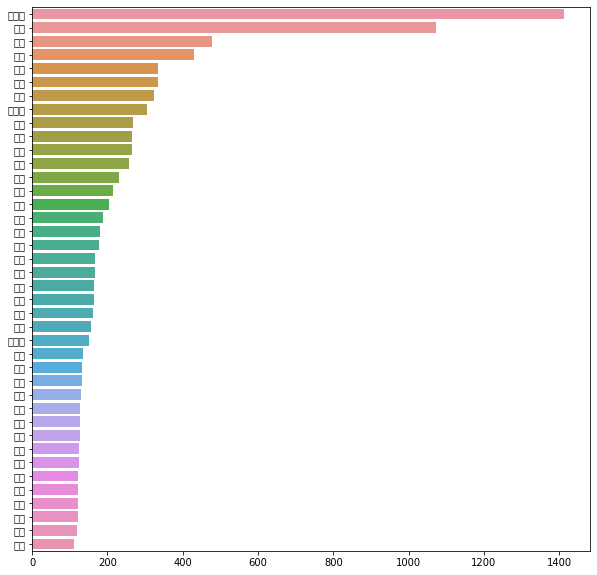

In [ ]:
analysis(topic_6)

## 불필요한 단어 제거

In [12]:
# 필요없는 단어 지우기 / 단어 대체
def word_delete(title):
    delete_word = [
        "1보",
        "2보",
        "3보",
        "4보",
        "5보",
        "속보",
        "사진",
        "게시판",
        "주말 N",
        "QA",
        "그래픽",
        "속보",
        "신간",
        "위클리",
        "주간 화제의 뉴스",
        "카드뉴스",
        "팩트체크",
    ]
    for i in delete_word:
        if title.endswith(i) or title.startswith(i):
            title = title.replace(i, "")
    if title.endswith("종합"):
        title = title[:-2]
    title = title.replace("↑", " 증가")
    title = title.replace("↓", " 감소")
    title = title.replace("→", "에서 ")
    title = title.replace("~", "에서 ")
    title = title.replace("...", ". ")
    title = title.replace("·", " 그리고 ")
    title = title.replace(":", " 대 ")
    title = title.upper()
    return title



## 불필요한 텍스트 제거

In [14]:
# 불필요한 텍스트 제거
def clean_text(title):
    title_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\\s.%]", " ", title)
    title_clean = re.sub(" +", " ", title_clean)
    title_clean = title_clean.strip()
    return title_clean

## 한자 변환

In [18]:
def chinese_char(text):
    import re

    # 2단어 이상
    text = re.sub("外人", "외국사람", text)
    text = re.sub("詩人", "시인", text)
    text = re.sub("日人", "일본사람", text)
    if re.search(r"[0-9]人", text):
        text = re.sub("人", "명", text)
    text = re.sub("人", "사람", text)
    text = re.sub("中企", "중소기업", text)
    text = re.sub("令和", "", text)
    text = re.sub("不備", "준비 안되다.", text)
    text = re.sub("印尼", "인도네시아", text)
    text = re.sub("반反", "반대", text)
    text = re.sub("부富", "재산", text)
    text = re.sub("^書香萬里", "", text)
    text = re.sub("最古", "가장 오래된", text)
    text = re.sub("^社告", "", text)
    text = re.sub("對野", "야당", text)
    text = re.sub("氷魚", "", text)
    text = re.sub("眞朴", "박근혜와 친한", text)
    text = re.sub("非朴", "박근혜와 반대", text)
    text = re.sub("破七", "", text)
    text = re.sub("私黨", "개인의 당", text)
    text = re.sub("親朴", "박근혜와 친한", text)
    text = re.sub("邪敎", "사이비 종교", text)
    if re.search("[가-핳]銀", text):
        text = re.sub("銀", "은행", text)
    text = re.sub("非文", "문재인 반대", text)
    text = re.sub("四體", "", text)
    text = re.sub("潘風", "반기문 세력", text)
    text = re.sub("駐英", "영국 주재원", text)
    text = re.sub("高法", "고등법원", text)

    # 개별 단어
    text = re.sub("丁", "정세균", text)  # 사람의 성씨 지금은 정세균 국회의장 #3
    text = re.sub("七", "칠", text)  # 사람이름으로 사용됨 괄호 안에 #1
    text = re.sub("三", "삼", text)  # 3색으로 사용된 괄호 안에 #1
    text = re.sub("中", "중국", text)  # 중국 #771
    text = re.sub("乙", "을", text)  # 차선의 의미, 을말고 다른 단어를 사용하는 것이 좋아보임 #2
    text = re.sub("亞", "아시아", text)  # 23
    text = re.sub(
        "人", "명", text
    )  # 숫자人 : 명, 한글人 : 사람(국석기人), 外人 : 외국인, 詩人 : 시인, 日人 : 일본인 #13
    text = re.sub("仙", "선", text)  # 神仙 : 신선 #1
    text = re.sub("代", "대", text)  # 대를 잇다, 숫자代 : 10대
    text = re.sub("令", "령", text)  # 일본 연호 레이와(令和)에 사용 #1 # 명령에도 사용
    text = re.sub("企", "기", text)  # 中企 : 중소기업 으로 사용됨 모두 다 #14
    text = re.sub("伊", "이탈리아", text)  # 127
    text = re.sub("佛", "프랑스", text)  # 90
    text = re.sub("備", "비", text)  # 不備 : 불비, 갖추지않음
    text = re.sub("先", "먼저", text)  # 7
    text = re.sub("內", "안에", text)  # 지역內 : 어디안에 #1
    text = re.sub("全", "전체", text)  # 3
    text = re.sub("分", "당을 나누다.", text)  # 당을 나누다 #3 分黨: 분당
    text = re.sub("前", "이전", text)  # 이전 #94
    text = re.sub("北", "북한", text)  # 1293
    text = re.sub("千", "천정배", text)  # 국민의 당 천정배 #7
    text = re.sub("協", "협회", text)  # 화합할 협 #2
    text = re.sub("南", "한국", text)  # 36
    text = re.sub("印", "인도", text)  # 印尼 : 인도네시아 # 8(7,1)
    text = re.sub("反", "반대", text)  # 반反 -> 반(反)로 추정 #52
    text = re.sub("古", "오래된", text)  # 最古 -> 최고 # 1
    text = re.sub("史", "역사", text)  # 3
    text = re.sub("告", "고", text)  # 社告 -> 사고(회사광고) 맨 앞에 게시판 처럼 나옴 삭제필 # 2
    text = re.sub("和", "통합", text)  # 1개는 통합 나머지 하나는 令和(일본 연호) # 2
    text = re.sub("四", "4", text)  # 四體 -> 4가지 글씨체 # 1
    text = re.sub("在", "", text)  # 뭔의미인지 모르겠음 在伊 -> 뜻이 안나옴 # 1
    text = re.sub(
        "外", "외", text
    )  # 단독: ~외 몇건 삭제 필, 外人 : 외인 기사 맨앞(게시판)으로 사용 되거나 외국인으로 사용됨 삭제해도 무방할듯 # 24
    text = re.sub("大", "대학교", text)  # 大戰 : 대결, 大寒 : 절기 중 대한
    text = re.sub("妻", "부인", text)  # 1
    text = re.sub("委", "워원회", text)  # 7
    text = re.sub("子", "아들", text)  # 1
    #text = re.sub("孫", "손학규", text)  # 손학규 # 14
    #text = re.sub("安", "안철수", text)  # 안철수 # 61
    text = re.sub("家", "집안", text)  # 가문 주로 기업뒤에 붙어 사용 # 6
    text = re.sub("富", "재산", text)  # 재산 부富 -> 부(富) # 2
    text = re.sub("寒", "한", text)  # 절기 대한 # 1
    text = re.sub("對", "대결", text)  # 對野 대야 대야당 # 21
    text = re.sub("小", "", text)  # 작다 #1 삭제무방
    #text = re.sub("尹", "윤석열", text)  # 윤석열 # 2
    text = re.sub("尼", "", text)  # 인도네시아 뒷 글자 # 2
    text = re.sub("展", "전시회", text)  # 19
    text = re.sub("山", "산", text)  # 1
    text = re.sub("島", "섬", text)  # 1
    #text = re.sub("崔", "최순실", text)  # 최순실 # 4
    text = re.sub("州", "도시", text)  # 미국의 주, 시나 도시로 변경 # 4
    text = re.sub("巨", "큰", text)  # 巨野 거야(큰야당) 로 사용 # 2
    text = re.sub("市", "도시", text)  # 도시 # 1
    text = re.sub("式", "방식", text)  # 방법 # 1
    text = re.sub("弗", "달러", text)  # 돈, 달러 # 8
    text = re.sub("强", "강하다", text)  # 1
    text = re.sub("後", "뒤", text)  # 4
    text = re.sub("心", "마음", text)  # 4
    text = re.sub("情", "정", text)  # 1
    text = re.sub("惡", "악", text)  # 2
    text = re.sub("戰", "전투", text)  # 大戰로 사용됨 모두 # 2
    text = re.sub("政", "정부", text)  # 1
    text = re.sub("故", "", text)  # 죽은 사람 삭제해도 될듯 # 25
    text = re.sub("敎", "종교", text)  # 1
    #text = re.sub("文", "문재인", text)  # 181
    text = re.sub("料", "요금", text)  # 1
    text = re.sub("新", "새로운", text)  # 17
    text = re.sub("日", "일본", text)  # 460
    text = re.sub("書", "서", text)  # 書香萬里 로 기사 제목 앞에 사용됨(게시판) # 2
    #text = re.sub(
      #  "曺", "조국 법무부장관", text
    #)  # 조국 # 11 조국이라는 이름이 나라라는 뜻이 있을 수 있어 다른 방법의 치환이 필요해 보임
    text = re.sub("最", "최", text)  # 最古 # 1
    text = re.sub("月", "한 달", text)  # 5
    #text = re.sub("朴", "박근혜", text)  # 박근혜 # 659
    text = re.sub("株", "주식", text)  # 18
    text = re.sub("核", "핵폭탄", text)  # 3
    text = re.sub("案", "안건", text)  # 2
    text = re.sub("機", "기계", text)  # 1
    text = re.sub("檢", "검찰", text)  # 73
    text = re.sub("比", "대비", text)  # 12
    text = re.sub("氣", "기", text)  # 2
    text = re.sub("氷", "빙", text)  # 氷魚 삭제해도 될듯 # 1
    text = re.sub("江", "강", text)  # 1
    text = re.sub("法", "법", text)  # 7
    #text = re.sub("洪", "홍경영", text)  # 정치인 # 2
    text = re.sub("海", "해", text)  # 西海 서해 # 1
    text = re.sub("港", "항구", text)  # 1
    text = re.sub("湖", "호수", text)  # 1
    #text = re.sub("潘", "반기문", text)  # 8
    text = re.sub("無", "없다", text)  # 9
    text = re.sub("煎", "전", text)  # 花煎 화전 # 1 삭제
    text = re.sub("燈", "조명", text)  # 2
    text = re.sub("父", "아버지", text)  # 3
    text = re.sub("獨", "독일", text)  # 137
    text = re.sub("王", "왕", text)  # 1
    text = re.sub("現", "현재", text)  # 1
    text = re.sub("生", "삶", text)  # 1
    text = re.sub("申", "신", text)  # 2 # 삭제도 가능
    text = re.sub("男", "남자", text)  # 11
    text = re.sub("發", "발생", text)  # 7
    text = re.sub("百", "백화점", text)  # 6
    text = re.sub("眞", "진", text)  # 眞朴 : 박근혜와 친한, 非朴 # 박근혜 반대 # 2
    text = re.sub("知", "", text)  # 1 # 삭제
    text = re.sub("破", "포", text)  # 破七 사람이름 삭제 # 1
    text = re.sub("硏", "연구소", text)  # 27
    text = re.sub("社", "회사", text)  # 社告 는 삭제 # 5
    text = re.sub("神", "신", text)  # 神仙 # 1
    #text = re.sub("禹", "우병우", text)  # 정치인 11
    text = re.sub("私", "사", text)  # 사적인 私黨: 사당 개인의 당 # 1
    #text = re.sub("秋", "추미애", text)  # 정치인 # 9
    text = re.sub("稅", "세금", text)  # 1
    text = re.sub("空", "공", text)  # 空約 공약 # 1
    text = re.sub("童", "동", text)  # 아이 童心 동심 # 1
    text = re.sub("約", "약", text)  # 空約 공약 # 1
    text = re.sub("美", "미국", text)  # 1467
    text = re.sub("脫", "벗어난", text)  # 탈 # 3
    text = re.sub("臺", "대만", text)  # 1
    text = re.sub("與", "여당", text)  # 290
    text = re.sub("舊", "구", text)  # 예전 # 1
    text = re.sub("色", "색", text)  # 5
    text = re.sub("花", "화", text)  # 삭제 화전
    text = re.sub("英", "영국", text)  # 283
    text = re.sub("茶", "차", text)  # 삭제 # 1
    text = re.sub("萬", "만", text)  # 書香萬里 삭제
    text = re.sub("號", "팀", text)  # 12
    text = re.sub("行", "행", text)  # 삭제도 가능 할 듯 # 44
    text = re.sub("西", "서", text)  # 西海 서해 1
    text = re.sub("親", "친한", text)  # 親朴 친박 친한 박근혜 # 13
    text = re.sub("詩", "시", text)  # 시조 도 좋을 듯 # 14
    text = re.sub("誌", "지", text)  # 1
    text = re.sub("說", "가설", text)  # 1
    text = re.sub("論", "논의", text)  # 2
    text = re.sub("證", "증권", text)  # 7
    text = re.sub("賞", "상", text)  # 1
    #text = re.sub("趙", "조윤선", text)  # 정치인 # 1
    text = re.sub("車", "자동차", text)  # 14
    text = re.sub("軍", "군대", text)  # 69
    text = re.sub("通", "통화", text)  # 1
    text = re.sub("道", "도로", text)  # 1
    text = re.sub("選", "선별", text)  #  1
    text = re.sub("邪", "사", text)  # 邪敎 사이비 종교
    #text = re.sub("鄭", "정진석", text)  # 정치인 # 1
    text = re.sub("酒", "주", text)  # 삭제 # 1
    text = re.sub("醫", "의사 협회", text)  # 1
    text = re.sub("里", "리", text)  # 書香萬里 삭제 # 2
    text = re.sub("重", "중공업", text)  # 18
    text = re.sub("野", "야당", text)  # 180
    #text = re.sub("金", "김정은", text)  # 북한 머리 # 12
    text = re.sub("銀", "은메달", text)  # 18 # 은행 하나銀, 은메달 銀
    text = re.sub("銅", "동메달", text)  # 2
    text = re.sub("阿", "아시아", text)  # 2
    text = re.sub("院", "구성원", text)  # 2
    text = re.sub("靑", "청와대", text)  # 377
    text = re.sub("非", "아닌", text)  # 非文 : 문제인 반대, 非朴 : 박근혜 반대
    text = re.sub("韓", "한국", text)  # 109
    text = re.sub("風", "세력", text)  # 潘風 : 반기문 세력, # 6
    text = re.sub("香", "", text)  # 書香萬里 삭제 # 2
    text = re.sub("駐", "주재원", text)  # 駐英 : 영국 주재원 # 8
    text = re.sub("體", "체", text)  # 四體 삭제 # 1
    text = re.sub("高", "높은", text)  # 高法 : 고등법원 # 3
    text = re.sub("魚", "어", text)  # 빙어 삭제 # 1
    #text = re.sub("黃", "황교안", text)  # 정치인 # 16
    text = re.sub("黨", "정당", text)  # 13
    return text


## 동의어 치환

In [15]:
# 비슷한 의미를 가진 단어들 중 가장 빈도수가 많은 것으로 통일함 
# 내 뇌피셜로 해서 부정확(?), 아이폰, 갤럭시 -> 다 폰으로 할 것인지 ? 

def same_meaning(x):
    x = re.sub("스마트폰", "폰", x)
    x = re.sub("휴대폰", "폰", x)
    x = re.sub('갤', '갤럭시', x)
    x = re.sub("lg 30", "LG 폰", x)
    x = re.sub('LG G3', 'LG 폰', x)  # lg폰으로 ?
    x = re.sub('갤럭시 노트', '갤럭시', x)
    x = re.sub("갤럭시 10", "갤럭시", x)
    x = re.sub("삼성 노트", "갤럭시", x)
    # x = re.sub('삼성전자', '삼성', x)
    x = re.sub("삼성 전자", "삼성", x)
    x = re.sub("인공 지능", "인공지능", x)
    x = re.sub("갤럭시 폴드", "갤럭시", x)
    x = re.sub('카카오톡', '카톡', x)
    x = re.sub("휴대폰", "폰", x)
    # x = re.sub("패드", "태블릿", x)
    x = re.sub('지난해', '전년', x)
    x = re.sub("금융감독원", "금감원", x)
    x = re.sub("리스크", "위험", x)
    x = re.sub('테크', '기술', x)
    x = re.sub("베스트", "최고", x)  # 베스트셀러는 포함 안되겠지
    x = re.sub("한해", "연간", x)
    x = re.sub("대한민국", "한국", x)
    x = re.sub('남한', '한국', x)
    x = re.sub("온도", "기온", x)
    x = re.sub("갤럭시 폴드", "갤럭시", x)
    x = re.sub('카카오톡', '카톡', x)
    x = re.sub("대학교", "대학", x)
    x = re.sub('스토어', '매장', x)
    x = re.sub("점포", "매장", x)
    x = re.sub("고등학교", "고교", x)
    x = re.sub("대법원", "대법", x)
    x = re.sub('시내버스', '버스', x)
    x = re.sub("페스티벌", "축제", x)
    x = re.sub("제주도", "제주", x)
    x = re.sub('경기도', '경기', x) # 시합 경기랑 헷갈리려나
    x = re.sub("강원도", "강원", x)
    x = re.sub('전라도', '전라', x)
    x = re.sub("트렌드", "유행", x)
    x = re.sub('서울시', '서울', x)
    x = re.sub("페북", "페이스북", x)
    x = re.sub('군대', '군', x)
    return x

## 불용어 제거

korean stopwords reference : https://deep.chulgil.me/hangugeo-bulyongeo-riseuteu/

## eda 적용

In [21]:
def word_eda(title):
    title = chinese_char(title)
    title = same_meaning(title)
    title = word_delete(title)
    title = clean_text(title)
    return title

In [22]:
train_e = train.copy()
train_e["title"] = train_e["title"].apply(word_eda)
train_e

,index,title,topic_idx
0,0,인천에서 핀란드 항공기 결항 휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴 선진국 시장 공략,1
45650,45650,서울교육청 신종코로나 확산에 개학 연기 그리고 휴업 검토,2
45651,45651,키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


In [23]:
test = pd.read_csv('/content/drive/MyDrive/2023 딥러닝/test_data.csv')
test

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


In [24]:
test_e = test.copy()
test_e["title"] = test_e["title"].apply(word_eda)
test_e

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보 눈 3.1CM 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,아리랑TV 아프리카개발은행 총회 개회식 생중계


In [25]:
# 저장
train_e.to_csv("/content/drive/MyDrive/2023 딥러닝/train_preprocess.csv")
test_e.to_csv("/content/drive/MyDrive/2023 딥러닝/test_preprocess.csv")

# 문장 벡터 생성

https://velog.io/@dayday/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EB%B6%84%EB%A5%982-%EB%AA%A8%EB%8D%B8%EB%A7%81

1. 텍스트 데이터 분석
2. 벡터화 및 전처리 작업
3. 정제된 텍스트 데이터를 활용해서 문장 벡터 만들기
* Tf-idf를 사용해서 문장 벡터 만들기
4. 텍스트 분류 모델

> Tf-idf 벡터화

* min_df :
설정한 값보다 특정 토큰의 df값이 더 적게 나오면 벡터화 과정에서 제거한다는 의미이다.
참고로 DF는 document frequency의 약자이다.

* analyzer :
분석하기 위한 기준 단위. word, char 두 가지 옵션이 있는데, word는 단어 하나를 단위로 하고 char는 문자 하나를 단위로 한다.

* sublinear_tf :
문서의 단어 빈도 수(TF, term frequency)에 대한 스무딩 여부.

* ngram_range :
빈도의 기본 단위를 어느 범위의 n-gram으로 설정할 것인지 물어보는 것.

* max_features :
각 벡터의 최대 길이, 특징의 길이

https://dacon.io/competitions/official/235747/codeshare/2875?page=2&dtype=recent

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 형태소 분석기(Okt) 불러오기 
okt=Okt() 

In [ ]:
# 조사, 어미, 구두점 제거
def func(text):
    clean = []
    for word in okt.pos(text, stem=True): #어간 추출
        if word[1] not in ['Josa', 'Eomi', 'Punctuation']: #조사, 어미, 구두점 제외 
            clean.append(word[0])
    
    
    return " ".join(clean) 

train['title'] = train['title'].apply(lambda x : func(x))

In [ ]:
# tf-idf를 이용한 벡터화
def split(text):
    tokens_ko = text.split()
    return tokens_ko

tfidf_vect = TfidfVectorizer(tokenizer=split)
tfidf_vect.fit(train['title'])
tfidf_matrix_train = tfidf_vect.transform(train['title'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# train/valid 데이터 셋 나누기.
def split_dataset(tfidf,df):
    X_data = tfidf
    y_data = df['topic_idx']

    # stratify=y_data Stratified 기반 분할, train 데이터의 30%를 평가 데이터 셋으로 사용. (70% 데이터 학습에 사용)
    X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)

    
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = split_dataset(tfidf_matrix_train,train)

In [ ]:
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(X_train,y_train)

* word2vec으로 벡터화를 진행하고, lightgbm을 사용한 분류 모델을 만들기

# 토픽모델링

### 토픽모델링 개념




https://heytech.tistory.com/401

> 토픽모델링 개념

* 토픽 모델링(Topic Modeling)은 텍스트 기반의 문서 데이터에서 **핵심 주제(Topic)를 찾는 텍스트마이닝** 방법론입니다. 


* 특히, 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링의 가장 **대표적인 알고리즘**입니다.


* 구체적으로, **LDA 토픽 모델링**은 확률 기반의 모델링 기법을 통해 방대한 양의 문서 데이터를 분석함으로써 **문서 내에 어떤 토픽이, 어떤 비율로 구성되어 있는지 분석**합니다.


* 또한, 토픽별로 어떤 **키워드가 구성**되었는지 정보를 제공하기 때문에, 키워드 조합을 통해 인사이트를 도출하는 데 효과적인 장점이 있습니다. 


* ex) 최근에는 LDA 토픽 모델링을 통해 SNS에서 유사한 토픽을 자동으로 분류하거나 항공사 온라인 리뷰를 분석하여 고객 니즈를 도출하는 등 다양한 분야에서 연구가 활발히 진행되고 있습니다.

In [67]:
# 모듈
from tqdm import tqdm # 작업 프로세스 시각화
import re # 문자열 처리를 위한 정규표현식 패키지
from gensim import corpora # 단어 빈도수 계산 패키지
import gensim # LDA 모델 활용 목적
import pyLDAvis.gensim_models # LDA 시각화용 패키지
from collections import Counter # 단어 등장 횟수 카운트

In [29]:
# 전처리 데이터 불러오기
train_e = pd.read_csv('/content/drive/MyDrive/2023 딥러닝/test_preprocess.csv')
train_e

,Unnamed: 0,index,title
0,0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,1,45655,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...,...
9126,9126,54780,인천 오후 3시35분 대설주의보 눈 3.1CM 쌓여
9127,9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건
9128,9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,9129,54783,아리랑TV 아프리카개발은행 총회 개회식 생중계


In [64]:
train_clean = train_e.copy()
train_clean

,Unnamed: 0,index,title
0,0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,1,45655,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...,...
9126,9126,54780,인천 오후 3시35분 대설주의보 눈 3.1CM 쌓여
9127,9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건
9128,9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,9129,54783,아리랑TV 아프리카개발은행 총회 개회식 생중계


### 데이터 정리 및 전처리

https://happy-obok.tistory.com/5

In [65]:
#데이터 프레임의 'title' 열의 값들을 str 형식으로 바꾸기
train_clean.title = train_clean.title.astype(str)

#index와 timestamp 열을 기준으로 중복된 데이터를 삭제, inplace : 데이터 프레임을 변경할지 선택(원본을 대체)
#train_clean.drop_duplicates(subset=['index','title'], inplace=True)

#한글이 아니면 빈 문자열로 바꾸기
#train_clean['title'] = train_clean['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

#빈 문자열 NAN 값으로 바꾸기
#train_clean = train_clean.replace({'': np.nan})
#train_clean = train_clean.replace(r'^\s*$', None, regex=True)

#NAN 이 있는 행은 삭제
#train_clean.dropna(how='any', inplace=True)

#인덱스
#train_clean = train_clean.reset_index (drop = True)

#데이터 프레임에 null 값이 있는지 확인
#print(train_clean.isnull().values.any()) 

+ KoNLPy는 한국어의 자연어 처리(NLP)를 위한 Python 패키지

   = okt 클래스의 nouns를 사용하여 명사 추출.
문장에서 명사만 추출하여 리스트 형식으로 저장.

In [80]:
from konlpy.tag import Okt
Okt = Okt()

In [81]:
# 타이틀 데이터를 리스트로 변환
Data_list=train_clean.title.values.tolist()

#리스트를 요소별로(타이틀 하나) 가져와서 명사만 추출한 후 리스트로 저장
data_word=[]
for i in range(len(Data_list)):
    try:
        data_word.append(Okt.nouns(Data_list[i]))
    except Exception as e:
        continue

# 뉴스타이틀에서 명사만 추출해서 만든 리스트
data_word

[['유튜브', '내달', '크리에이터', '지원', '공간', '운영'],
 ['어버이날', '남부', '지방', '황사'],
 ['내년', '국가', '평가', '때', '논문', '건수', '반영'],
 ['김명자', '신임', '과총', '회장', '원로', '과학자', '지혜', '것'],
 ['회색', '인간', '작가', '김', '동식', '양심', '고백', '등', '새', '소설', '집', '권', '간'],
 ['야외', '생방송', '액션', '캠', '전용', '금제'],
 ['월드컵', '태극전사', '강', '초기', '레오', '강', '입성'],
 ['미세먼지', '속', '출근길'],
 ['왓츠앱', '세금', '레바논', '민심', '총리', '사퇴'],
 ['베트남', '경제', '성장', '지속', '성장'],
 ['그리스', '국전', '참전', '기념', '참전용사', '한반도', '평화', '기원'],
 ['정진석', '이정현', '현실'],
 ['미국', '베네수엘라', '구호', '품', '반입', '촉구', '안보리', '결의', '추진'],
 ['황재균', '쐐기', '타', '길', '삼성', '고춧가루'],
 ['정상회담', '대통령', '취임', '후', '남북관계', '주요', '일지'],
 ['영업', '익', '마케팅', '비용', '감소'],
 ['박원순', '시장', '아부다비', '루브르', '박물관', '방문'],
 ['방심위', '강릉', '고성', '산불', '현장', '보도', '관계자', '징계'],
 ['파키스탄', '경제', '속', '카타르', '달러', '투자', '유치'],
 ['일본', '예산', '팽창', '재정', '건전성', '우려', '내년', '장기', '채무', '배'],
 ['칠레', '민중', '가수', '살해', '미국', '도피', '전', '군인', '법정'],
 ['일본', '온라인', '중국인', '비자', '신청'],
 ['동부', '마비', '악

In [78]:
Data_list

['유튜브 내달 2일까지 크리에이터 지원 공간 운영',
 '어버이날 맑다가 흐려져 남부지방 옅은 황사',
 '내년부터 국가RD 평가 때 논문건수는 반영 않는다',
 '김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것',
 '회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간',
 '야외서 생방송 하세요 액션캠 전용 요금제 잇따라',
 '월드컵 태극전사 16강 전초기지 레오강 입성',
 '미세먼지 속 출근길',
 '왓츠앱세금 230원에 성난 레바논 민심 총리사퇴로 이어져',
 '베트남 경제 고성장 지속 2분기 GDP 6.71% 성장',
 '그리스서 한국전 참전 기념식 참전용사 한반도 평화 기원',
 '정진석 이정현 당현실 냉정하게 봐야 물러나는게 좋다',
 '미국 베네수엘라 구호품 반입 촉구 안보리 결의 추진',
 '황재균 쐐기타 KT 갈 길 바쁜 삼성에 고춧가루',
 '정상회담 D1 대통령 취임 후 남북관계 주요 일지',
 'LGU 1분기 영업익 1천706억원 마케팅 비용 감소',
 '박원순 시장 아부다비 루브르 박물관 방문',
 '방심위 강릉서 고성 산불현장처럼 보도한 KBS 관계자 징계',
 '파키스탄 경제난 속 카타르서 30억 달러 투자 유치',
 '일본 예산팽창에 재정건전성 우려 내년에 장기채무 GDP 2배',
 '칠레 민중가수 살해하고 미국 도피 전 군인 법정에 선다',
 '일본 온라인으로 중국인 비자신청 받는다',
 '미 동부 마비시킨 악성 파일 국내서도 발견',
 '국내 발간 나노분야 학술지 나노 컨버전스 SCIE 등재',
 '5G 상용화 행정절차 완료 이통3사 내일 동시 전파 발사',
 '예스24 독자들이 선정한 올해의 책 여행의 이유',
 '이해찬 정경두에 안보지원사 기무사 같은 일 없도록 해야',
 '미래부 17개 부처별 연구비관리시스템 2개로 통합한다',
 '손흥민 더 승부욕 갖고 거칠게 해야 나부터 반성',
 'SK텔레콤안양시 모빌리티 그리고 스마트시티 조성 업무협약',
 '울산 오후 4시 건조주의보',
 '기업들 일본규제 직접

(추가) 토큰화


* KoNLPy에서 속도 및 토큰화 측면에서 성능이 가장 우수한 Mecab 형태소 분석기를 활용. 특히, 명사가 문장 내 맥락을 파악하는 데 핵심 형태소이며 빈출 어휘를 쉽게 파악할 수 있다는 장점이 있음

   = 타이틀에서 명사만 추출

In [82]:
# mecab 명사 추출
train_token = list(map(lambda title: mecab.nouns(title), train_clean))
train_token

[[], [], []]

### LDA 모델 객체 생성

* gensim.models.wrappers.LdaMallet 모듈을 사용하면 깁스 샘플링을 사용하여 훈련 코퍼스에서 LDA 모델을 추정할 수 있음

> LDA모델에 들어갈 객체 생성


* id2 word: Dictionary에 list of list of str 형식의 documents를 입력하면 Dictioanry 가 학습됩니다.** 전체 말뭉치에서 단어가 겹치지 않도록 하나씩 dictionary에 저장**됩니다. (단어를 int 형식의 idx로 변환)

* corpus : 타이틀 리스트 안의 단어를  bag-of-words 형태->  list of (token_id, token_count) 2-tuples로 **변환**합니다.

 
      [[(id2 word [id], freq) for id, freq in cp] for cp in corpus [:50]]
   로 사람이 볼 수 있는 딕셔너리를 확인할 수 있습니다.
  

 
> gensim.models.wrappers.LdaMallet 매개 변수

* mallet_path ( str ) : mallet 바이너리의 경로
* corpus (iterable of iterable of (int, int), optional):BoW 형식의 텍스트 모음
* num_topics (int, optional) – Number of topics.:주제 수
* alpha (int, optional) – Alpha parameter of LDA.:LDA의 알파 매개 변수
* id2 word (Dictionary, optional): 토큰 ID와 코퍼스에서 단어 사이의 매핑, 지정되지 않은 경우 -에서 유추
* optimize_interval (int, optional): optimize_interval 반복마다 하이퍼 파라미터를 최적화
* iterations (int, optional) :훈련 반복 횟수
* topic_threshold (float, optional): 주제를 고려할 확률의 임계 값

https://mimno.github.io/Mallet/import

https://mimno.github.io/Mallet/topics.html

In [ ]:
bin/mallet import-dir --input /data/topic-input --output topic-input.mallet \
  --keep-sequence --remove-stopwords

In [89]:
## mallet 경로 지정 오류...
# ldamallet에 학습된 lda모델이 저장
id2word = corpora.Dictionary(data_word)
id2word.filter_extremes(no_below = 20) #20회 이하로 등장한 단어는 삭제
texts = data_word
corpus=[id2word.doc2bow(text) for text in texts]

mallet_path = '/content/drive/MyDrive/Colab Notebooks/package/mallet-2.0.8/bin/mallet' 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


CalledProcessError: ignored

## 토픽 수 별 일관성 점수 계산

models.coherencemodel 주제 모델에 대한 주제 일관성을 계산

model :주제가 제공되지 않은 경우 사전 훈련된 주제 모델을 제공해야 합니다. 현재 지원 LdaModel, LdaMulticore, LdaMallet와 LdaVowpalWabbit.
topics(list of list of str, optional) :토큰 화 된 토픽의 목록
texts (list of list of str, optional) :슬라이딩 창 기반 (예 : coherence =c_something) 확률 추정 기를 사용하는 일관성 모델에 필요한 토큰 화 된 텍스트.
corpus (iterable of list of (int, number), optional) :BoW 형식의 코퍼스.
dictionary (Dictionary, optional) : Gensim dictionary mapping of id word to create corpus. If model.id2 word is present, this is not needed. If both are provided, passed dictionary will be used.
coherence ({'u_mass', 'c_v', 'c_uci', 'c_npmi'}, optional) :
topn (int, optional) : 각 주제에서 추출할 최상위 단어 수에 해당하는 정수
processes (int, optional) : 확률 추정 단계에 사용할 프로세스 수

In [ ]:
# Coherence 점수를 계산하여 좋은 LDA 모델 찾기

coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()


def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_word, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=21, step=2)




limit=21; start=4; step=2;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1

        
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)
#print(optimal_model.print_topics(num_words=10))








def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=10)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, Data['text'],Data['timestamp'],Data['tweet_url'],Data['screen_name'],Data['label']], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=Data_list)

# Format
df_topic_tweet = df_topic_sents_keywords.reset_index()
df_topic_tweet.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text','Timestamp', 'Tweet_url','Screen_name','label']

# Show각 문서에 대한 토픽
#df_dominant_topic=df_dominant_topic.sort_values(by=['Dominant_Topic'])
#df_topic_tweet



# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "Text", "timestamp", "tweet_url","screen_name","label","Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num","Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_tweet['Dominant_Topic'] =df_topic_tweet['Dominant_Topic'] +1
df_topic_tweet.Dominant_Topic = df_topic_tweet.Dominant_Topic.astype(str)
df_topic_tweet['Dominant_Topic'] =df_topic_tweet['Dominant_Topic'].str.split('.').str[0]

## 토픽 모델링 결과 확인

## 토픽 별 뉴스 저장

## LDAvis로 토픽 모델 시각화



---



### LDA 토픽 모델링

In [ ]:
NUM_TOPICS = 10 # 토픽 개수는 하이퍼파라미터
# passes: 딥러닝에서 Epoch와 같은 개념으로, 전체 corpus로 모델 학습 횟수 결정
PASSES = 15

In [ ]:
def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics = NUM_TOPICS, 
                                            id2word = dictionary, 
                                            passes = PASSES)
    return model, corpus, dictionary

In [ ]:
def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./result/topic_prop_' + RATING +  '.xlsx')
    display(topic_prop)

In [ ]:
def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    # 시각화 결과 저장
    RESULT_FILE = './result/lda_result_' + RATING + '.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)



---



# 텍스트 분류




텍스트 분류(Text Classification)는 텍스트를 입력으로 받아 텍스트가 어떤 종류의 범주에 속하는지를 구분하는 작업을 말합니다. 가령, 스팸 메일 분류를 한다고 한다면, 스팸 메일 분류는 일반 메일과 스팸 메일이라는 두 개의 범주를 정해놓고 입력받은 메일 본문을 두 개의 메일 종류 중 하나로 분류하는 작업이 될 것입니다.

https://wikidocs.net/22891

> RNN

RNN(순환 신경망,Recurrent Neural Network)은 언어 모델에서 많이 쓰이는 딥러닝 모델 중 하나이다.

주로 순서가 있는 데이터, 즉 문장 데이터를 입력해 문장 흐름에서 패턴을 찾아 분류하게 한다. 앞선 모델들과 달리, 이미 주어진 단어 특징 벡터를 활용해 모델을 학습하지 않고 텍스트 정보를 입력해서 문장에 대한 특징 정보를 추출한다.

RNN은 이전 정보가 점층적으로 쌓이면서 현재 정보를 표현하는 모델이다. 따라서 시간에 의존적인 또는 순차적인 데이터에 대한 문제에 활용된다.

https://velog.io/@dayday/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EB%B6%84%EB%A5%983-%EB%AA%A8%EB%8D%B8%EB%A7%81

https://wikidocs.net/45101